In [1]:
from IPython.display import YouTubeVideo

# Utility Code in this Repo
from the_office.data import do_all_data_loading
from the_office.eda import get_dialogue, line_search
from the_office.transform import (filter_cast,
                                  get_cast_by_scene,
                                  shared_scene_matrix)
from the_office.viz import pairwise_scene_plot

# Intro

We struck gold and found a pretty sweet dataset that had every line of dialogue from The Office.

A bunch of cleaning later, it generally looks like this:

In [2]:
df = do_all_data_loading()
df.head()

,id,season,episode,scene,line_text,speaker
0,1,1,1,1,All right Jim. Your quarterlies look very good...,michael
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",jim
2,3,1,1,1,So you've come to the master for guidance? Is ...,michael
3,4,1,1,1,"Actually, you called me in here, but yeah.",jim
4,5,1,1,1,"All right. Well, let me show you how it's done.",michael


Where each row represents a line of dialogue, labeled by when it happened in the script and who spoke it.

With the help of some simple text-parsing methods, we can better investigate this file for classic lines from the show.

In [3]:
line_search(df, 'bears. beets. battlestar galactica')

,id,season,episode,scene,line_text,speaker
13409,15346,3,20,1,Fact. Bears eat beets. Bears. Beets. Battl...,jim


And filter down to the rows of data around them

In [4]:
bbbg = get_dialogue(df, season=3, episode=20, scenes=[1, 4])
bbbg

,id,season,episode,scene,line_text,speaker
13405,15342,3,20,1,[Dressed as Dwight] It's kind of blurry. [puts...,jim
13406,15343,3,20,1,That's a ridiculous question.,dwight
13407,15344,3,20,1,False. Black bear.,jim
13408,15345,3,20,1,Well that's debatable. There are basically tw...,dwight
13409,15346,3,20,1,Fact. Bears eat beets. Bears. Beets. Battl...,jim
13410,15347,3,20,1,Bears do not--- What is going on--- What are y...,dwight
13411,15348,3,20,2,"Last week, I was in a drug store and I saw the...",jim
13412,15349,3,20,3,You know what? Imitation is the most sincere ...,dwight
13413,15350,3,20,3,... MICHAEL!,jim
13414,15351,3,20,3,"Oh, that's funny. MICHAEL!",dwight


And print them for your captioning-convenience

In [5]:
for idx, row in bbbg.iterrows():
    *_, quote, speaker = row
    print(speaker, ':\n', quote)

jim :
 [Dressed as Dwight] It's kind of blurry. [puts on his glasses] That's better. [exhales] Question.  What kind of bear is best?
dwight :
 That's a ridiculous question.
jim :
 False.  Black bear.
dwight :
 Well that's debatable.  There are basically two schools of thought---
jim :
 Fact.  Bears eat beets.  Bears.  Beets.  Battlestar Galactica.
dwight :
 Bears do not--- What is going on--- What are you doing?!
jim :
 Last week, I was in a drug store and I saw these glasses.  Uh, four dollars.  And it only cost me seven dollars to recreate the rest of the ensemble.  And that's a grand total of... [Jim calculates the total on his calculator-watch] eleven dollars.
dwight :
 You know what?  Imitation is the most sincere form of flattery, so I thank you. [Jim places a bobble-head on his desk]  Identity theft is not a joke, Jim!  Millions of families suffer every year!
jim :
 ... MICHAEL!
dwight :
 Oh, that's funny.  MICHAEL!


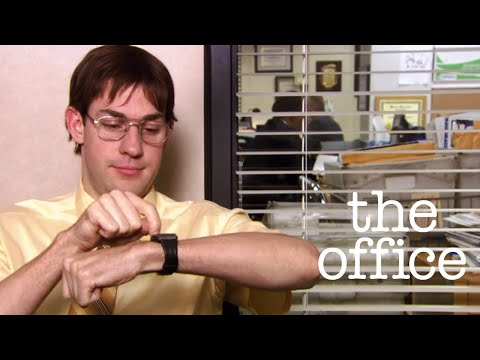

In [6]:
YouTubeVideo(id='WaaANll8h18', width=500)

## Links

All of the source code for this post can be found at https://github.com/napsterinblue/the-office-lines

Credit to /u/misunderstoodpoetry [for actually pulling the dataset together](https://www.reddit.com/r/datasets/comments/6yt3og/every_line_from_every_episode_of_the_office_us/?st=jgwtj0fy&sh=41c5561d)